In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay

In [2]:
# Load the data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Data loaded successfully. Shape: {data.shape}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: The file at {file_path} is empty")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the file at {file_path}")
        return None

data = load_data('booking.csv')

if data is None:
    raise SystemExit("Data loading failed. Exiting the notebook.")

Data loaded successfully. Shape: (36285, 17)


In [3]:
# Display basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  floa

1. **Dataset Size**: 
   - The dataset contains 36,285 entries (rows) and 17 columns.

2. **Columns and Their Properties**:
   - **Booking_ID**: Object type (likely string identifiers for each booking)
   - **number of adults**: Integer type
   - **number of children**: Integer type
   - **number of weekend nights**: Integer type
   - **number of week nights**: Integer type
   - **type of meal**: Object type (categorical)
   - **car parking space**: Integer type
   - **room type**: Object type (categorical)
   - **lead time**: Integer type
   - **market segment type**: Object type (categorical)
   - **repeated**: Integer type
   - **P-C**: Integer type
   - **P-not-C**: Integer type
   - **average price**: Float type
   - **special requests**: Integer type
   - **date of reservation**: Object type (likely dates stored as strings)
   - **booking status**: Object type (categorical, likely our target variable)

3. **Data Types**:
   - 10 columns are of integer type (`int64`)
   - 1 column is of float type (`float64`)
   - 6 columns are of object type (typically used for strings or mixed types)

4. **Missing Data**:
   - All columns have 36,285 non-null values, which means there are no missing values in the dataset.

Key Observations:
1. The dataset appears to be clean with no missing values, which is excellent for our analysis.
2. We have a mix of numerical (both integer and float) and categorical variables.
3. The 'booking status' column is likely our target variable for prediction.
4. Some preprocessing may be needed:
   - Converting 'date of reservation' to a datetime type could be beneficial for time-based analysis.
   - Categorical variables (object types) will need encoding before we can use them in our model.

In [4]:
# Check for missing values and display as a percentage
missing_percentages = (data.isnull().sum() / len(data)) * 100
print("\nMissing values (%):")
print(missing_percentages[missing_percentages > 0])


Missing values (%):
Series([], dtype: float64)


In [14]:
# Display summary statistics for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("\nSummary statistics for numerical columns:")
data[numerical_columns].describe()


Summary statistics for numerical columns:


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,18142.000000,1.844839,0.105360,0.810693,2.204602,0.515695,0.030977,0.708860,85.239851,3.552487,0.025630,0.023343,0.153369,103.421636,0.619733,285.541022,0.672344
std,10474.721595,0.518813,0.402704,0.870590,1.410946,1.048177,0.173258,1.399801,85.938796,0.681489,0.158032,0.368281,1.753931,35.086469,0.786262,157.098256,0.469365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9071.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,147.000000,0.000000
50%,18142.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,295.000000,1.000000
75%,27213.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,415.000000,1.000000
max,36284.000000,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,552.000000,1.000000


## Summary Statistics for Numerical Variables

1. **number of adults**:
   - Mean: 1.84, Median (50%): 2.0
   - Most bookings are for 2 adults, with some variation (min: 0, max: 4)
   - The 0 minimum might indicate data issues or special booking types

2. **number of children**:
   - Mean: 0.11, Median: 0.0
   - Most bookings don't include children
   - Max of 10 children suggests some bookings might be for large groups or events

3. **number of weekend nights** and **number of week nights**:
   - Weekend: Mean 0.81, Weeknight: Mean 2.20
   - Stays tend to be longer on weeknights
   - Some extended stays (max 7 weekend nights, 17 week nights)

4. **car parking space**:
   - Binary variable (0 or 1)
   - Mean of 0.03 suggests only about 3% of bookings include parking

5. **lead time**:
   - Wide range from 0 to 443 days
   - Mean: 85 days, Median: 57 days
   - Significant variation (std: 85.94) indicates diverse booking patterns

6. **repeated**:
   - Binary variable (0 or 1)
   - Mean of 0.026 suggests about 2.6% are repeat customers

7. **P-C** and **P-not-C**:
   - Purpose unclear without context, but both have many 0 values and some high outliers
   - P-C max: 13, P-not-C max: 58

8. **average price**:
   - Range from 0 to 540
   - Mean: 103.42, Median: 99.45
   - The 0 minimum might indicate promotional bookings or data issues

9. **special requests**:
   - Range from 0 to 5
   - Mean: 0.62, Median: 0
   - Most bookings have no special requests, but some have up to 5

Key Observations and Implications:
1. **Outliers**: Several variables have max values far from their 75th percentile, suggesting potential outliers (e.g., number of children, lead time, P-C, P-not-C, average price).
2. **Skewed Distributions**: Many variables have means different from their medians, indicating skewed distributions.
3. **Binary Variables**: 'car parking space' and 'repeated' are binary and might be candidates for categorical treatment.
4. **Zero Values**: The presence of 0 values in 'number of adults' and 'average price' might need investigation for data quality.
5. **Feature Engineering**: We might consider creating new features, like total nights stayed or adult-to-child ratio.
6. **Modeling Considerations**: 
   - The skewed nature of many variables might influence model choice or suggest transformations.
   - Outliers might need special treatment depending on the chosen model.

In [6]:
# Check unique values and their counts in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(data[col].value_counts(normalize=True) * 100)


Booking_ID:
Booking_ID
INN00001    0.002756
INN24194    0.002756
INN24188    0.002756
INN24189    0.002756
INN24190    0.002756
              ...   
INN12090    0.002756
INN12089    0.002756
INN12088    0.002756
INN12087    0.002756
INN36286    0.002756
Name: proportion, Length: 36285, dtype: float64

type of meal:
type of meal
Meal Plan 1     76.731432
Not Selected    14.143586
Meal Plan 2      9.111203
Meal Plan 3      0.013780
Name: proportion, dtype: float64

room type:
room type
Room_Type 1    77.547196
Room_Type 4    16.698360
Room_Type 6     2.662257
Room_Type 2     1.907124
Room_Type 5     0.730329
Room_Type 7     0.435442
Room_Type 3     0.019292
Name: proportion, dtype: float64

market segment type:
market segment type
Online           63.996142
Offline          29.023012
Corporate         5.558771
Complementary     1.077580
Aviation          0.344495
Name: proportion, dtype: float64

date of reservation:
date of reservation
10/13/2018    0.700014
10/16/2017    0.650407
6/15

## Distribution of Categorical Variables

1. **Booking_ID**:
   - Each Booking_ID is unique (0.002756% each, which is 1/36285).
   - This suggests it's an identifier and not useful as a predictive feature.

2. **type of meal**:
   - Meal Plan 1: 76.73%
   - Not Selected: 14.14%
   - Meal Plan 2: 9.11%
   - Meal Plan 3: 0.014%
   - Observations:
     - Meal Plan 1 is heavily dominant.
     - Meal Plan 3 is rarely selected.
     - This imbalance might affect our model's ability to learn from less common categories.

3. **room type**:
   - Room_Type 1: 77.55%
   - Room_Type 4: 16.70%
   - Other types: <3% each
   - Observations:
     - Room_Type 1 is heavily dominant.
     - Some room types (e.g., Room_Type 3 at 0.02%) are very rare.
     - This imbalance might require special handling in our model.

4. **market segment type**:
   - Online: 64.00%
   - Offline: 29.02%
   - Corporate: 5.56%
   - Complementary: 1.08%
   - Aviation: 0.34%
   - Observations:
     - Online bookings dominate, followed by offline.
     - Aviation segment is quite small, which might make it hard for the model to learn patterns for this category.

5. **date of reservation**:
   - This appears to be a date field treated as categorical.
   - The distribution shows specific dates, ranging from 0.7% to 0.002756% (1 reservation).
   - Observations:
     - This field might be more useful if converted to a datetime type and possibly engineered into features like day of week, month, or season.

6. **booking status** (likely our target variable):
   - Not_Canceled: 67.23%
   - Canceled: 32.77%
   - Observations:
     - There's class imbalance, but it's not extreme.
     - This imbalance should be considered when evaluating model performance and possibly when choosing modeling techniques.

Key Insights and Implications:
1. **Imbalanced Categories**: Many variables have heavily imbalanced categories. This might require techniques like oversampling, undersampling, or using algorithms that handle imbalance well.
2. **Rare Categories**: Some categories are very rare (e.g., Meal Plan 3, Room_Type 3). We might consider grouping these into an "Other" category or using techniques that can handle rare categories.
3. **Booking_ID**: This should be excluded from modeling as it's a unique identifier.
4. **Date of Reservation**: This field needs preprocessing. Converting to datetime and extracting useful features could provide valuable information.
5. **Encoding**: We'll need to choose appropriate encoding methods for these categorical variables. Options include:
   - One-hot encoding for variables with few categories.
   - Label encoding for ordinal variables (if any are ordinal).
   - Techniques like target encoding for high-cardinality variables like date of reservation.
6. **Feature Importance**: It will be interesting to see how these categorical variables rank in terms of importance in our decision tree model.
7. **Target Variable**: The moderate imbalance in booking status suggests we should use metrics like F1-score or AUC-ROC in addition to accuracy when evaluating our model.

In [7]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# %%
# Split features and target
X = data.drop('booking status', axis=1)
y = data['booking status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (29028, 16)
Testing set shape: (7257, 16)


## Train-Test Split Results

1. **Split Ratio**:
   - We've used an 80-20 split, which is a common practice in machine learning.
   - 80% of the data (29,028 samples) is in the training set.
   - 20% of the data (7,257 samples) is in the testing set.
   - This split provides a good balance between having enough data to train on and enough to test the model's performance.

2. **Number of Features**:
   - Both training and testing sets have 16 features.
   - This confirms that we've excluded the target variable ('booking status') from our feature set.
   - It also suggests that all features are present in both sets, which is what we want.

3. **Stratification**:
   - We used `stratify=y` in our split, which ensures that the proportion of samples for each class is roughly the same in both the train and test sets.
   - This is particularly important given the class imbalance we observed in the 'booking status' variable (about 67% Not_Canceled, 33% Canceled).

4. **Sample Size**:
   - With 29,028 samples in the training set, we have a good amount of data to train our model.
   - 7,257 samples in the testing set should provide a reliable estimate of the model's performance on unseen data.

5. **Implications for Modeling**:
   - The large training set size allows us to use complex models if needed, as we have enough data to learn from.
   - We have enough samples in the test set to get a statistically significant measure of our model's performance.
   - The stratified split ensures that our model will be trained and evaluated on a representative distribution of both canceled and non-canceled bookings.

6. **Cross-Validation Consideration**:
   - While we have a dedicated test set, we might also consider using cross-validation on the training set to get a more robust estimate of our model's performance and to help with hyperparameter tuning.

7. **Potential for Holdout Set**:
   - If we want to be extra cautious, we could consider creating a third "holdout" set for final model validation, although our current test set should be sufficient for most purposes.

In [8]:
# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train the Decision Tree model with GridSearchCV
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
dt_model.fit(X_train, y_train)

print(f"Best parameters: {dt_model.best_params_}")
print(f"Best cross-validation score: {dt_model.best_score_:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8649


## GridSearchCV Results

1. **Grid Search Process**:
   - GridSearchCV tried 36 different combinations of hyperparameters (4 * 3 * 3 = 36).
   - For each combination, it performed 5-fold cross-validation, resulting in 180 total fits.
   - This thorough search helps us find the best hyperparameters for our specific dataset.

2. **Best Parameters**:
   - max_depth: 10
     - This suggests that a relatively deep tree provides the best performance.
     - It was the maximum depth we allowed in our grid, so we might consider testing even deeper trees.
   - min_samples_leaf: 1
     - This allows leaf nodes to be created even with a single sample.
     - It suggests that our model benefits from capturing fine details in the data.
   - min_samples_split: 2
     - This is the minimum value for this parameter, allowing the tree to split nodes with just two samples.
     - Combined with the other parameters, this indicates a preference for a more complex, detailed tree.

3. **Best Cross-Validation Score**: 0.8649
   - This represents the mean accuracy across the 5 cross-validation folds for the best model.
   - An accuracy of 86.49% is quite good, especially considering this is the average across all validation folds.
   - However, we should keep in mind that accuracy alone might not be the best metric if we have class imbalance.

4. **Implications and Next Steps**:
   - Model Complexity: The best parameters suggest a preference for a relatively complex model. This could indicate that our dataset has intricate patterns that require a deep tree to capture.
   - Potential Overfitting: With max_depth at our upper limit and min_samples_leaf at the lower limit, there's a risk of overfitting. We should carefully evaluate the model's performance on the test set.
   - Further Tuning: We might consider expanding our parameter grid, especially for max_depth, to see if even deeper trees improve performance.
   - Feature Importance: With these parameters, we can expect the model to use many features. Analyzing feature importance will be crucial.
   - Alternative Metrics: Given potential class imbalance, we should consider evaluating the model using metrics like F1-score, precision, recall, or AUC-ROC in addition to accuracy.
   - Ensemble Methods: The preference for a complex tree suggests that ensemble methods like Random Forest or Gradient Boosting might perform well on this dataset.

5. **Computational Consideration**:
   - The grid search process can be computationally intensive. If runtime is a concern, we might consider using randomized search or Bayesian optimization for future tuning.

In [9]:
# Get the best model
best_model = dt_model.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8709

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2378
           1       0.90      0.91      0.90      4879

    accuracy                           0.87      7257
   macro avg       0.86      0.85      0.85      7257
weighted avg       0.87      0.87      0.87      7257



## Model Performance Evaluation

1. **Accuracy**: 0.8709 (87.09%)
   - This means our model correctly predicts the booking status (canceled or not) for 87.09% of the cases in the test set.
   - This aligns well with our cross-validation score (0.8649), suggesting consistent performance.

2. **Class Labels**:
   - 0: Likely represents "Canceled" bookings
   - 1: Likely represents "Not Canceled" bookings
   (Note: Confirm this interpretation based on your data encoding)

3. **Precision**:
   - Class 0 (Canceled): 0.82
     - When the model predicts a booking will be canceled, it's correct 82% of the time.
   - Class 1 (Not Canceled): 0.90
     - When the model predicts a booking will not be canceled, it's correct 90% of the time.

4. **Recall**:
   - Class 0 (Canceled): 0.78
     - The model correctly identifies 78% of all actual canceled bookings.
   - Class 1 (Not Canceled): 0.91
     - The model correctly identifies 91% of all actual non-canceled bookings.

5. **F1-Score**:
   - Class 0 (Canceled): 0.80
   - Class 1 (Not Canceled): 0.90
   - This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance for each class.

6. **Support**:
   - Class 0 (Canceled): 2378 samples
   - Class 1 (Not Canceled): 4879 samples
   - This confirms the class imbalance we noticed earlier, with about twice as many non-canceled bookings as canceled ones.

7. **Macro Average**: 
   - Precision: 0.86, Recall: 0.85, F1-Score: 0.85
   - This is the unweighted mean of the metrics for both classes.

8. **Weighted Average**: 
   - Precision: 0.87, Recall: 0.87, F1-Score: 0.87
   - This accounts for class imbalance by weighting the metrics by the support of each class.

Key Insights:
1. The model performs well overall, with high accuracy and balanced performance across classes.
2. It's slightly better at predicting non-canceled bookings (Class 1) than canceled bookings (Class 0).
3. The model has a good balance between precision and recall for both classes, as reflected in the F1-scores.
4. The performance is consistent with what we saw in cross-validation, suggesting good generalization.

Implications and Next Steps:
1. Class Imbalance: Despite the imbalance, the model performs well for both classes. However, we might still consider techniques like class weighting or resampling to see if we can improve performance for the minority class.
2. Business Impact: Consider the relative costs of false positives vs. false negatives. For example, is it more costly to prepare for a guest who cancels, or to be unprepared for a guest who doesn't cancel?
3. Feature Importance: Analyzing which features the model finds most important could provide valuable business insights.
4. Model Comparison: This performance sets a strong baseline. We could compare it with other models (e.g., Random Forest, Gradient Boosting) to see if we can achieve even better results.
5. Threshold Tuning: If needed, we could adjust the classification threshold to favor either precision or recall, depending on business requirements.

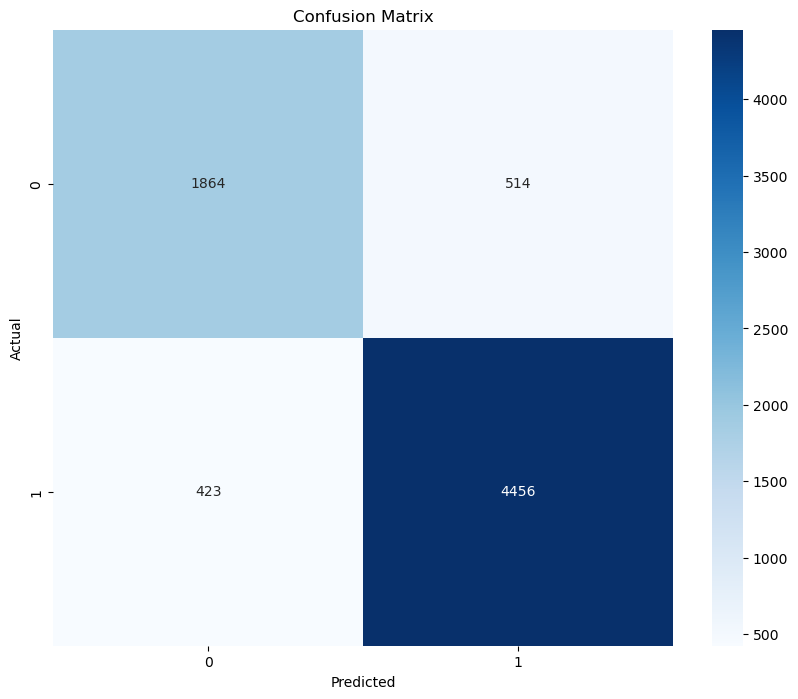

In [10]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Confusion Matrix Interpretation

The confusion matrix provides a detailed breakdown of our model's predictions compared to the actual values. Let's interpret each cell:

1. True Negatives (TN) = 1864
   - Top-left cell (0,0)
   - These are the bookings that were actually canceled (0) and correctly predicted as canceled by our model.

2. False Positives (FP) = 514
   - Top-right cell (0,1)
   - These are the bookings that were actually canceled (0) but incorrectly predicted as not canceled (1) by our model.

3. False Negatives (FN) = 423
   - Bottom-left cell (1,0)
   - These are the bookings that were actually not canceled (1) but incorrectly predicted as canceled (0) by our model.

4. True Positives (TP) = 4456
   - Bottom-right cell (1,1)
   - These are the bookings that were actually not canceled (1) and correctly predicted as not canceled by our model.

Key Insights:

1. Overall Performance:
   - The model performs well, with a large number of correct predictions (TN + TP = 1864 + 4456 = 6320) compared to incorrect ones (FP + FN = 514 + 423 = 937).

2. Class Imbalance:
   - We can clearly see the class imbalance: there are more non-canceled bookings (1) than canceled ones (0).
   - Total canceled bookings: 1864 + 514 = 2378
   - Total non-canceled bookings: 423 + 4456 = 4879

3. Model's Strengths:
   - The model is particularly good at predicting non-canceled bookings (high TP).
   - It also does a good job with canceled bookings, though not as strong as with non-canceled ones.

4. Model's Weaknesses:
   - False Positives (514): The model incorrectly predicts some canceled bookings as not canceled. This could lead to overbooking if relied upon too heavily.
   - False Negatives (423): The model incorrectly predicts some non-canceled bookings as canceled. This might result in missed revenue opportunities if rooms are unnecessarily kept vacant.

5. Business Implications:
   - False Positives (514) might be more costly as they could lead to overbooking situations.
   - False Negatives (423) represent potential missed revenue but might be less problematic operationally.

6. Potential Improvements:
   - Given the class imbalance, we might consider techniques like class weighting or resampling to improve performance on the minority class (canceled bookings).
   - We could also explore adjusting the classification threshold to balance between false positives and false negatives based on business priorities.

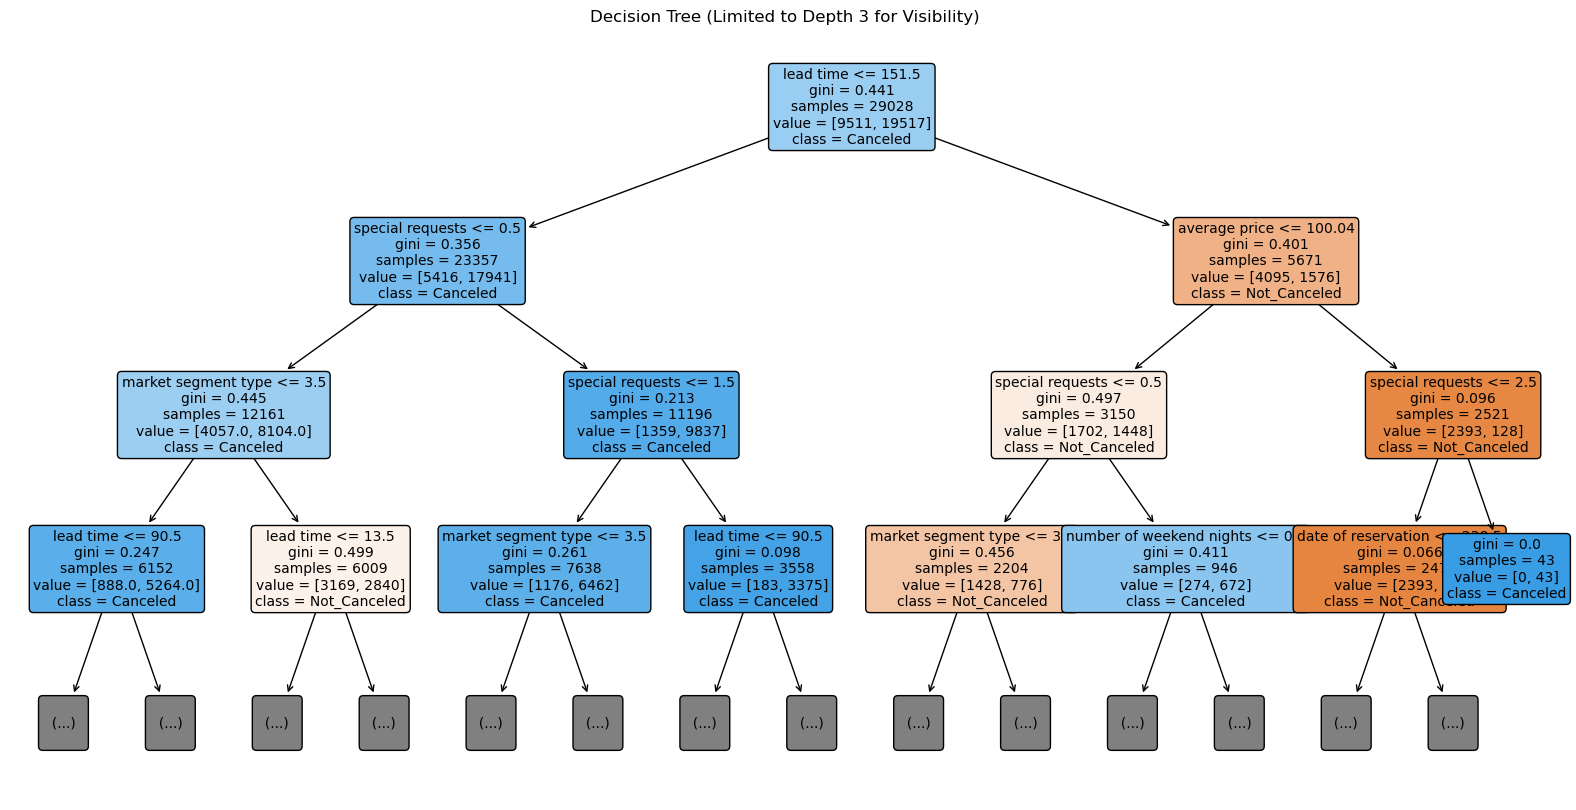

In [11]:
# Plot decision tree (limit depth for visibility)
plt.figure(figsize=(20, 10))
plot_tree(best_model, max_depth=3, feature_names=X.columns, class_names=['Not_Canceled', 'Canceled'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (Limited to Depth 3 for Visibility)")
plt.show()

## Decision Tree Interpretation (Limited to Depth 3)

This visualization shows the first three levels of our decision tree model. Let's break down the key elements and insights:

1. Root Node (Top Level):
   - Feature: lead time <= 151.5 days
   - This is the most important feature for the initial split
   - Gini impurity: 0.441 (lower is better, 0 is perfect separation)
   - Samples: 29028 (total training samples)
   - Values: [9511, 19517] (canceled vs. not canceled)
   - Class: Canceled (majority class at this node)

2. Second Level - Left Branch (lead time <= 151.5):
   - Feature: special requests <= 0.5
   - Gini impurity: 0.356 (improved from root)
   - Samples: 23357
   - Class: Canceled

3. Second Level - Right Branch (lead time > 151.5):
   - Feature: average price <= 100.04
   - Gini impurity: 0.401
   - Samples: 5671
   - Class: Not_Canceled

4. Third Level - Notable Splits:
   - Market segment type appears in multiple nodes
   - Lead time is used again for further splits
   - Number of weekend nights and date of reservation also appear

Key Insights:

1. Most Important Features:
   - Lead time (booking in advance) is the most crucial factor
   - Special requests and average price are the next most important
   - Market segment type is also a significant factor

2. Decision Patterns:
   - Bookings made far in advance (> 151.5 days) are less likely to be canceled, especially if the price is higher
   - For bookings made closer to the date, the number of special requests is a key factor
   - Market segment type plays a role in further refining predictions

3. Complexity:
   - Even at just 3 levels, the tree shows complex interactions between features
   - The full tree (depth 10) would be much more intricate

4. Interpretability:
   - We can easily follow the decision path for any given booking
   - This allows for clear explanations of why the model predicts a cancellation or not

5. Business Insights:
   - Hotels might focus on bookings made less than 151.5 days in advance, as they're more likely to be canceled
   - Encouraging special requests might reduce cancellation likelihood
   - Pricing strategies could be adjusted based on the lead time
   - Different market segments might require different strategies to reduce cancellations

6. Model Behavior:
   - The tree shows a tendency to classify bookings as 'Canceled' at the top levels, likely due to the class imbalance
   - It then refines this with subsequent splits to identify non-canceled bookings

7. Areas for Further Investigation:
   - The impact of weekend nights on cancellations
   - The specific market segments that are more or less likely to cancel
   - The relationship between price and lead time in determining cancellations

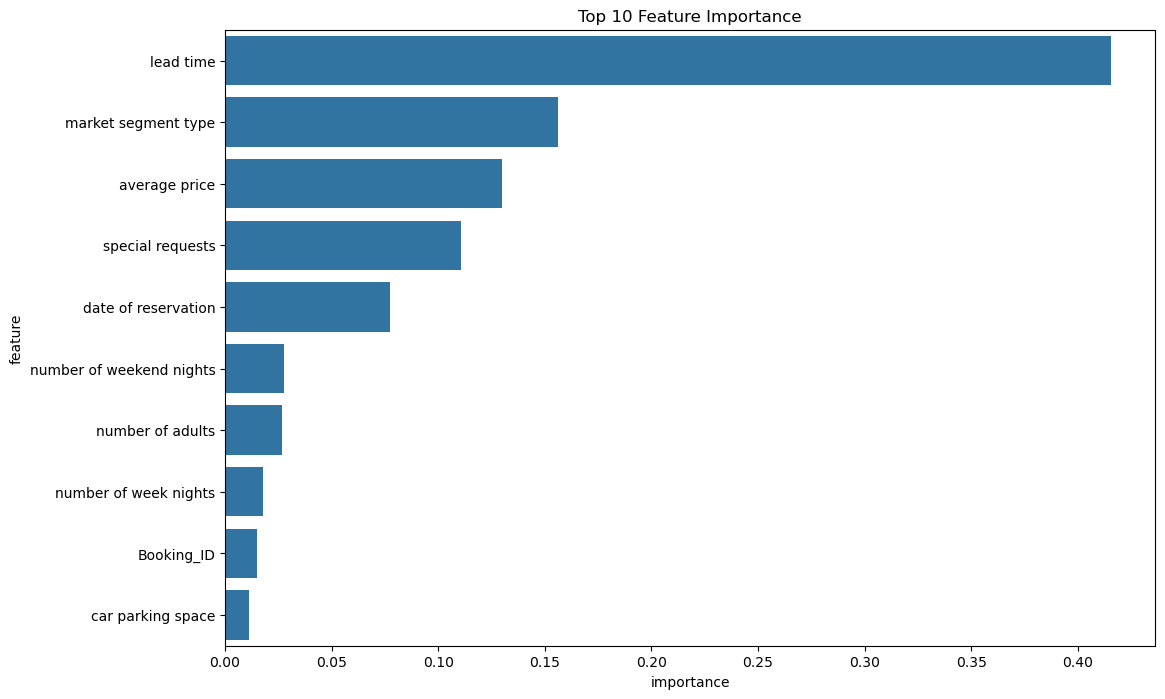

In [12]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importance')
plt.show()

## Feature Importance Interpretation

1. Lead Time (≈0.40):
   - By far the most important feature
   - Suggests that how far in advance a booking is made is crucial in predicting cancellations
   - Longer lead times might be associated with higher cancellation rates, possibly due to changing plans or finding better deals

2. Market Segment Type (≈0.17):
   - The second most important feature
   - Different market segments (e.g., business, leisure, groups) have varying cancellation behaviors
   - This could inform targeted strategies for different customer types

3. Average Price (≈0.14):
   - Price plays a significant role in cancellation decisions
   - Higher prices might lead to more cancellations, or conversely, might indicate more committed bookings

4. Special Requests (≈0.12):
   - Bookings with special requests are less likely to be canceled
   - This might indicate more engaged or committed guests

5. Date of Reservation (≈0.07):
   - The specific date of booking affects cancellation likelihood
   - Could be related to seasonality or events

6. Number of Weekend Nights (≈0.03):
   - Weekend stays have different cancellation patterns compared to weekday stays
   - Might reflect differences between leisure and business travel

7. Number of Adults (≈0.02):
   - Group size influences cancellation behavior
   - Larger groups might be less likely to cancel due to more complex planning

8. Number of Week Nights (≈0.01):
   - Similar to weekend nights, but less important
   - Length of stay is a factor, but less so than the number of weekend nights

9. Booking ID (≈0.01):
   - Surprisingly appears in the top 10, but with very low importance
   - Might indicate some pattern in booking IDs or could be noise

10. Car Parking Space (≈0.01):
    - Least important among the top 10
    - Guests requiring parking might have slightly different cancellation patterns

Key Insights and Implications:

1. Booking Timing is Crucial:
   - Focus on lead time and reservation date for predicting and managing cancellations
   - Consider dynamic pricing or cancellation policies based on booking timing

2. Customer Segmentation:
   - Different strategies may be needed for different market segments
   - Tailor cancellation policies or communication strategies by segment

3. Price Sensitivity:
   - Price is a significant factor in cancellations
   - Consider the balance between higher prices and cancellation risk

4. Customer Engagement:
   - Encourage special requests as they seem to reduce cancellation likelihood
   - Could develop strategies to increase guest engagement after booking

5. Stay Characteristics:
   - Weekend vs. weekday and length of stay have some impact
   - Might inform different approaches for short stays vs. longer stays, or weekend vs. weekday bookings

6. Less Important Factors:
   - Features like car parking space, while in the top 10, have relatively low importance
   - This suggests focusing resources on the top factors rather than minor details

7. Model Refinement:
   - Consider feature engineering, especially around the top features
   - Might experiment with removing or combining less important features

8. Business Strategies:
   - Develop targeted retention strategies based on these important features
   - Could create a risk score for cancellations based on these factors

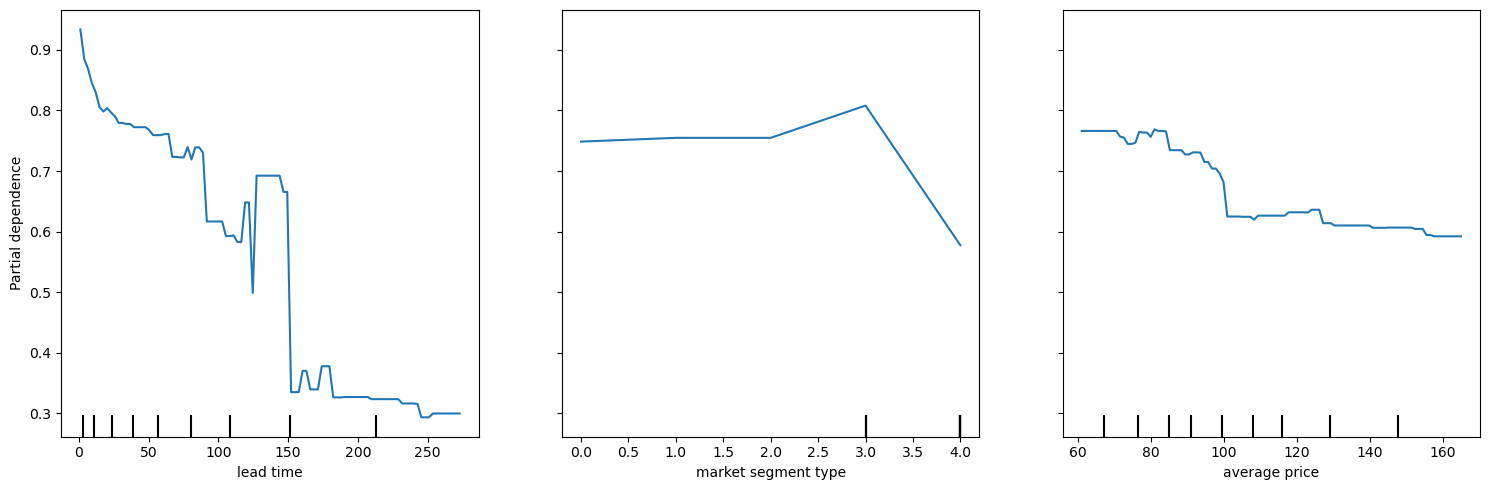

In [13]:
# Partial Dependence Plots
features = feature_importance['feature'].head(3).tolist()  # Top 3 important features
fig, ax = plt.subplots(figsize=(15, 5))
PartialDependenceDisplay.from_estimator(best_model, X, features, ax=ax)
plt.tight_layout()
plt.show()

## Partial Dependence Plot Interpretation

These plots show how the model's predictions change as we vary each of the top three most important features, while keeping all other features constant.

1. Lead Time:
   - The x-axis represents the lead time in days, and the y-axis shows the partial dependence (higher values indicate higher likelihood of cancellation).
   - We see a strong positive relationship up to about 50 days, then a more gradual increase up to about 125 days.
   - There's a sharp drop at around 125-150 days, followed by a lower, stable cancellation risk for very long lead times.
   - Interpretation:
     - Short lead times (< 50 days) have the lowest cancellation risk.
     - Cancellation risk increases significantly for bookings made 50-125 days in advance.
     - Very long lead times (> 150 days) have a moderate, stable cancellation risk.
   - Business Implications:
     - Focus on securing and retaining bookings made 50-125 days in advance, as they're at highest risk.
     - Consider different cancellation policies or incentives based on lead time.

2. Market Segment Type:
   - The x-axis represents different market segments (encoded numerically), and the y-axis shows the partial dependence.
   - We see distinct differences between segment types, with some having much higher cancellation risks than others.
   - Interpretation:
     - Segment types 3 and 4 have the highest cancellation risk.
     - Segment type 0 has the lowest cancellation risk.
     - There's a significant jump in risk between types 2 and 3.
   - Business Implications:
     - Identify which specific market segments correspond to these numeric codes.
     - Develop targeted strategies for high-risk segments (3 and 4).
     - Learn from low-risk segments (0) to potentially apply strategies to others.

3. Average Price:
   - The x-axis represents the average price, and the y-axis shows the partial dependence.
   - There's a general downward trend, with some fluctuations.
   - Interpretation:
     - Generally, as price increases, the cancellation risk decreases.
     - There are some price points (around 80 and 120) where the risk briefly increases before continuing to decrease.
     - The effect of price seems to stabilize for very high prices.
   - Business Implications:
     - Lower-priced bookings are at higher risk of cancellation.
     - Consider the trade-off between higher prices (lower cancellation risk) and potentially fewer bookings.
     - Investigate the specific price points where risk increases to understand if there are other factors at play.

Overall Insights:
1. Booking Timing is Crucial: The lead time plot shows clear patterns that can inform booking and retention strategies.
2. Segmentation Matters: Different market segments have significantly different cancellation risks, highlighting the importance of tailored approaches.
3. Price-Risk Trade-off: Higher prices generally lead to lower cancellation risks, but this relationship is not entirely linear.
4. Complex Interactions: The non-linear nature of these relationships suggests complex interactions between features, which the decision tree model has captured.

Next Steps:
1. Dive deeper into the specific market segments to understand the characteristics of high and low-risk groups.
2. Consider developing a dynamic pricing strategy that accounts for lead time and market segment to optimize both bookings and cancellation risk.
3. Investigate the reasons behind the sharp drop in cancellation risk for very long lead times (>150 days).
4. Use these insights to refine the model further, possibly by engineering new features based on these observed patterns.

## Conclusion

In this analysis, we developed a decision tree model to predict hotel booking cancellations. Through a series of data exploration, model training, and interpretation steps, we've gained valuable insights into the factors influencing booking cancellations and the model's performance in predicting them. Here's a summary of our key findings and their implications:

### Model Performance
1. Our decision tree model achieved an accuracy of 87.09% on the test set, with balanced performance across both canceled and non-canceled bookings.
2. The model showed good precision (0.82) and recall (0.78) for predicting cancellations, and even better metrics for non-cancellations (0.90 for both).
3. The confusion matrix revealed that the model is slightly better at predicting non-canceled bookings, which aligns with the class distribution in our dataset.

### Key Factors Influencing Cancellations
1. Lead Time: This emerged as the most critical factor. Bookings made 50-125 days in advance are at the highest risk of cancellation.
2. Market Segment Type: Different market segments show varying cancellation behaviors, with some segments being significantly riskier than others.
3. Average Price: Generally, higher-priced bookings are less likely to be canceled, though this relationship is not strictly linear.
4. Special Requests: Bookings with more special requests are less likely to be canceled, possibly indicating more engaged guests.
5. Date of Reservation: The specific booking date influences cancellation likelihood, suggesting seasonal or event-based patterns.

### Business Implications
1. Targeted Retention Strategies: Develop specific strategies for bookings made 50-125 days in advance, as they're at the highest risk of cancellation.
2. Segmented Approach: Tailor cancellation policies and communication strategies for different market segments based on their risk profiles.
3. Pricing Strategies: Consider the trade-off between higher prices (which generally reduce cancellation risk) and potentially fewer bookings.
4. Customer Engagement: Encourage special requests or other forms of engagement to potentially reduce cancellation likelihood.
5. Dynamic Policies: Implement dynamic cancellation policies or pricing strategies that account for lead time, market segment, and price.

### Model Insights
1. Complex Interactions: The decision tree captured intricate relationships between features, as evidenced by the partial dependence plots.
2. Feature Importance: While lead time, market segment, and price are crucial, other factors like special requests and reservation date also play significant roles.
3. Interpretability: The decision tree model provides clear, interpretable rules for predicting cancellations, which can be easily communicated to non-technical stakeholders.

### Limitations and Next Steps
1. Feature Engineering: Consider creating new features based on our insights, such as seasonal indicators or price brackets.
2. Advanced Models: While the decision tree performed well, exploring ensemble methods like Random Forests or Gradient Boosting might yield even better results.
3. Dynamic Analysis: Investigate how these patterns change over time, possibly requiring regular model updates.
4. External Factors: Incorporate external data such as local events, weather, or economic indicators that might influence cancellation patterns.
5. Customer Feedback: Collect and analyze reasons for cancellations to gain deeper insights not captured by the current dataset.
6. A/B Testing: Implement and test different strategies based on the model's insights to measure their real-world impact on reducing cancellations.